In [516]:
!pip install sympy

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import sympy as sy
from itertools import chain
from metpy.interpolate import interpolate_to_points

In [576]:
# parameters
fr = 50 #frequency for the Gabor filter
sigma = 20 #ms - sharpness of tuning for pulse period - filter duration
phi = mt.pi * 0 #phase shift - change the integer to change the phase 

w = 0.1 # (-0.1 to 0.1) offset - pulse duty cycle (duration/period)



#sampling frequency
dur_max = 20  # ms
dur_step = 0.5  # ms


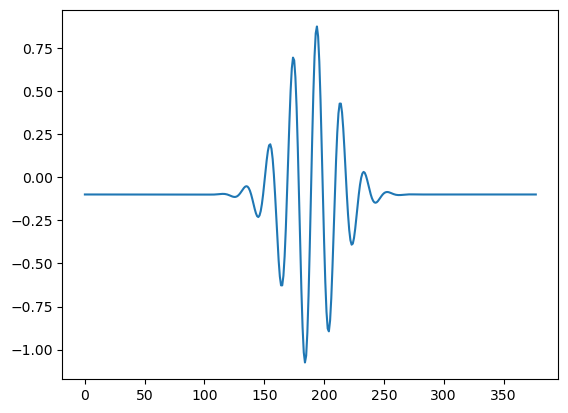

In [744]:
# def gabor(fr, sigma, phi, w):
#     border = sigma + int(1)
#     t =  np.arange(-100, 100, 1)/1000
#     gbr = ((np.exp( -(t/2*sigma)**2)) * (np.sin((2*mt.pi*fr*t) + phi)) + w) #Gabor function
#     return gbr
# gab = gabor(50, 50)
# plt.plot(gab)
# plt.show()

#The Gabor filter
def gabor(fr, sigma):
    border = sigma + int(1000/mt.sqrt(sigma))
    time =  range(-border, border)
    gbr = []
    for i in time:
        t = i/1000 # to get time in milliseconds
        gbr.append((mt.exp( -((t/2*sigma)**2)) * (np.sin((2*mt.pi*fr*t) + phi))) + w) #Gabor function
    return gbr
gab = gabor(50, 64)
plt.plot(gab)
plt.show()

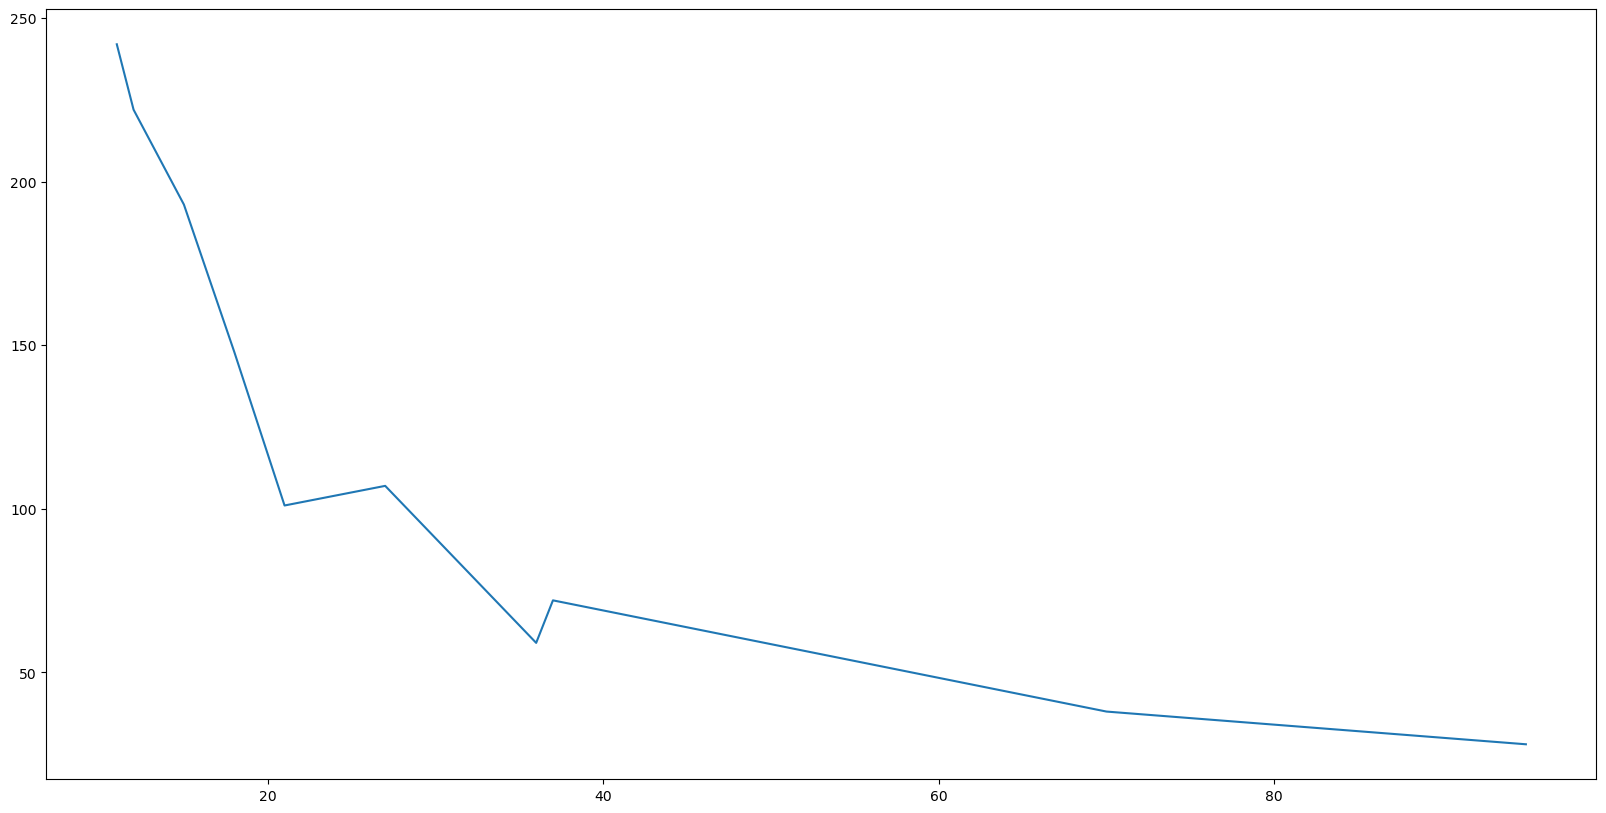

[[ 11 242]
 [ 12 222]
 [ 15 193]
 [ 18 148]
 [ 21 101]
 [ 27 107]
 [ 36  59]
 [ 37  72]
 [ 70  38]
 [ 95  28]]


In [733]:
# num = []
# k = []

# for n in range(8, 100):
#     gab = gabor(50, n)
#     for i in range(len(gab)):
#         if round(gab[i],3)==0 and round(gab[i+1],3)!=0:
#             num.append(abs(750-i))
#             k.append(n)
#             break
            
# plt.figure(figsize = (20, 10))
# plt.plot(k, num)
# plt.show()
# na = np.array([k, num]).T
# print(na)

In [ ]:
#generating the signal from the parameter duty cycle
def signal(idur, ipau, sf):
    unit = (sf/1000)
    dur = int(unit*idur)
    pau = int(unit*ipau)
    adur = np.ones(dur, dtype = int)
    apau = np.zeros(pau, dtype = int)
    aper = np.concatenate((adur,apau))
    sig = np.tile(aper, sf)
    return aper


In [ ]:
sf = 1000
sig = signal(dur, pau, sf)
gab = gabor(f, sigma)
#linear nonlinear filtering (including the integration)
def lin_nonlin(sig, gab, a1, b1):
    f1 = np.convolve(sig, gab) #linear filter
    
    g1 = 1/(1 + np.exp( -(a1 * f1) + b1)) # nonlinear sigmoid function

    #integral (which is basically summation)
    v1 = 0.001 * g1.sum()
    return v1

In [651]:

val = []
for i in range(-10, 11):
    w = i/100
    # print(w)
    val.append(lin_nonlin(3,2,50, 20, 0.002, 1))

# print(val)
plt.plot(val)
plt.show()

TypeError: signal() missing 1 required positional argument: 'sf'

In [554]:
# creating the pulse field
pdur_i0 = ppau_i0 = np.arange(0, dur_max, dur_step)
pdur_i, ppau_i = np.meshgrid(pdur_i0, ppau_i0)
new_points = np.array([pdur_i, ppau_i]).T.reshape((-1, 2))

In [555]:
sigma = 100

def calc(pdur, ppau, sigma):
    pper = pdur + ppau #period of a quanta of the cycle
    pw = 0 if pper==0 else (pdur/pper) #duty cycle
    lnl = lin_nonlin(pper, pw, sigma)
    return lnl

plt.plot(gabor(
calc = np.vectorize(calc)
res = calc(pdur_i, ppau_i, sigma)


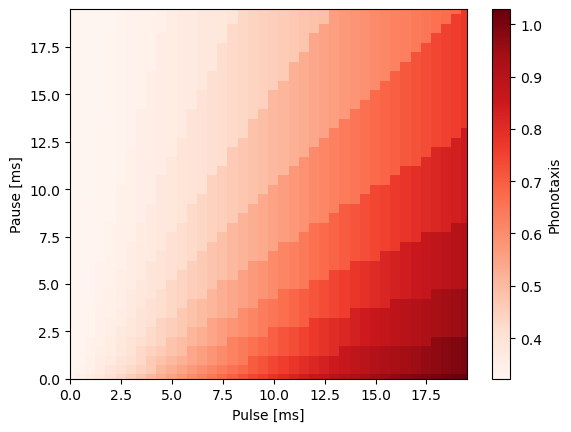

In [536]:
plt.pcolor(pdur_i, ppau_i, res, cmap='Reds')
plt.xlim(0, np.max(pdur_i))
plt.ylim(0, np.max(ppau_i))
plt.colorbar(label='Phonotaxis')
plt.xlabel('Pulse [ms]')
plt.ylabel('Pause [ms]')
plt.show()